# Grossman HW 3 - STP 494

Importing our packages:

In [1]:
import os
import math
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#pre-processing modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#KNN model
from sklearn.neighbors import KNeighborsRegressor

#MSE
from sklearn.metrics import mean_squared_error

#Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

os.chdir('/Users/danielgrossman/Documents/Coursework/STP 494/Data/')

Setting up the data:

In [2]:
cd = pd.read_csv('susedcars.csv')
y = cd['price'].to_numpy()/1000
x = cd[['mileage','year']].to_numpy() 
x[:,0] = x[:,0]/1000

In [3]:
#scaling the data down
scl = StandardScaler()
X = scl.fit_transform(x)

KNN time!

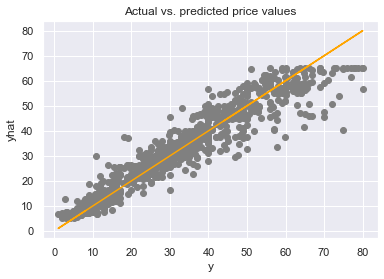

In [4]:
knn = KNeighborsRegressor(n_neighbors=50) #k=50
knn.fit(X,y)

#in-sample fits
yhat = knn.predict(X)

#plotting how well the model fits
plt.scatter(y,yhat,c='grey')
plt.plot(y,y,c='orange')
plt.xlabel('y'); plt.ylabel('yhat')
plt.title('Actual vs. predicted price values')
plt.show()

Let's do cross-validation to find the optimal k:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 2

Minimum RMSE:  5.466155500974536
Optimal k:  28


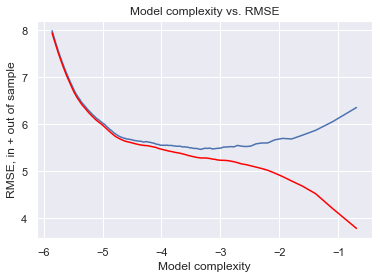

In [5]:
#setting up values for CV
kvec = np.arange(348) + 2 #our k-values the code will loop thru
mcmp = np.log(1/kvec) #model complexity

model = KNeighborsRegressor()

#do CV @ every value of k in kvec
trainS, testS = validation_curve(model,X,y,'n_neighbors',kvec,cv=10,scoring='neg_mean_squared_error')

#transforming neg_mean_squared_error to rmse
trrmse = np.sqrt(-trainS.mean(axis=1))
termse = np.sqrt(-testS.mean(axis=1))

#plot in and out of sample rmse
plt.plot(mcmp,termse)
plt.plot(mcmp,trrmse,c='red')
plt.xlabel('Model complexity'); plt.ylabel('RMSE, in + out of sample')
plt.title('Model complexity vs. RMSE')

## which is min?
minim = np.argmin(termse)
print("Minimum RMSE: ", np.min(termse))
print("Optimal k: ", kvec[minim])

Now let's do a KNN with the optimal k-value:

In [6]:
model.n_neighbors = kvec[minim] #giving the model our k
model.fit(X,y)

#predict at mileage = 98, year = 2013
xp = np.array([75,2008]).reshape((1,2))
print("Predict at: ",xp)
xpt = scl.transform(xp)
print("Predict at (scaled): ",xpt)
ypred = model.predict(xpt)
print("Predicted price at miles=75, year=2008:", ypred)

Predict at:  [[  75 2008]]
Predict at (scaled):  [[0.03143734 0.25306936]]
Predicted price at miles=75, year=2008: [31.59642857]
